## GLOBAL

### Big file

In [7]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSflat_Spr-Fa18.root'

MCfileName_NOsignal = "/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/trees/flatten/tree_pipkslamb__B4_M16_M18_genamp2_fall2018_FSflat.root"

MCfileName_NOsignalTHROWN = "/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/thrown/flatten/tree_thrown_gen_amp_V2_FSflat_ALL.root"

# SIGNAL MC WITH t-slope
MCfileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'

# signal mc; w/t-slope; all plugins
MCfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/trees/flatten/tree_pipkslamb_sp-fa18_B4M16M18_genamp2_FSflat_ALLPLUGINS.root'

# signal mc; w/t-slope; only REACTION_FILTER plugin
MCfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__sp-fa18_B4_M16_M18_gen_amp_V2_FSflat_REACTIONFILTER-ONLY.root'

THROWNfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_ALLPLUGINS.root'

THROWNfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_RXNfltrONLY.root'

treeName = 'ntFSGlueX_100000000_1100'

# metaData = 'Spring & Fall 2018. FSFlat.  B4__M16_M18'


### Little file

In [2]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSFlat_small.root'
treeName = 'ntFSGlueX_100000000_1100'

######## ADDED BELOW FOR TESTING CODE THAT LOOKS FOR MONTE CARLO FILES ########

# # SIGNAL MC WITH t-slope
# MCfileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'

# # signal mc; w/t-slope; all plugins
# MCfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/trees/flatten/tree_pipkslamb_sp-fa18_B4M16M18_genamp2_FSflat_ALLPLUGINS.root'

# # signal mc; w/t-slope; only REACTION_FILTER plugin
MCfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__sp-fa18_B4_M16_M18_gen_amp_V2_FSflat_REACTIONFILTER-ONLY.root'

# THROWNfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_ALLPLUGINS.root'

# THROWNfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_RXNfltrONLY.root'

### Startup

In [3]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# DEFINE VARIABLES CORRESPOONDING TO THE INDICES
DecayingLambda = "1"
Proton = "1a"
PiMinus2 = "1b"
DecayingKShort = "2"
PiPlus2 = "2a"
PiMinus1 = "2b"
PiPlus1 = "3"
NegOne = "-1.*"

# THROWN TREE INDICES
# 1. Lambda4 (0)   1a. Proton5 (1)   1b. PiMinus6 (2)
# 2. KShort1 (3)   2a. PiPlus2 (4)   2b. PiMinus3 (5)
# 3. PiPlus0 (6)

#  - MCDecayParticle1
#  - MCDecayParticle2
#  - MCDecayParticle3
#  - MCDecayParticle4
#  - MCDecayParticle5
#  - MCDecayParticle6


################################ MANDELSTAM t VARIABLES ################################


# # ####### 1D t variables #######
# file = ROOT.TFile.Open(fileName)
# tree = file.Get(treeName)
# tree.SetAlias("mand_t", f"{NegOne}*MASS2(GLUEXTARGET,-{DecayingLambda})") # Define a new alias 'mand_t' on the tree
# ROOT.FSCut.defineCut("tRange","mand_t","0.0","0.25","-0.1","0.0","0.25","2.5")

# mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"
# ROOT.FSFit.defineVariable("mand_t", f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})")



# ####### 1D t variables #######
# mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"
# mand_t_k = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort})"
# mand_t_pi = f"{NegOne}MASS2(GLUEXBEAM,-{PiPlus1})"
# mand_t_kpi = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort},-{PiPlus1})"

# def mand_t0(I, J):
#     return f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"

# mand_tPrime_kpi = f"{mand_t_kpi} - ({mand_t0(DecayingKShort, PiPlus1)})"
# # mand_tPrime = 
# # mand_tPrime_k =
# # mand_tPrime_pi = 

# ####### 2D t variables #######
# mand_t_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_t_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

# mand_t0_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_t0_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

# mand_tPrime_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_tPrime_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

########################################################################################

# CUSTOM 4-VECTORS

# from line 617: https://github.com/remitche66/FSRoot/blob/93bf25be31344a50fc1065e37017513ec56c8ced/FSBasic/FSTree.C#L617
 # defineFourVector("GLUEXBEAM","EnPB","PxPB","PyPB","PzPB");
 
 # dbarton 6/6/2025
ROOT.FSTree.defineFourVector("MCGLUEXBEAM","MCEnPB","MCPxPB","MCPyPB","MCPzPB");


# DEFINE CUTS
ROOT.FSCut.defineCut("rf","RFDeltaT", "-2.004","2.004", "-20.0","-6.0","6.0","20.0", 1./6.) # from Hao's kp pi0 channel.  Adjust for kspip
ROOT.FSCut.defineCut("chi2DOF","Chi2DOF","0.0","5.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
ROOT.FSCut.defineCut("tRange",f"abs(MASS2(GLUEXTARGET,-{DecayingLambda})<1.0)")

ROOT.FSCut.defineCut("flightSigLambda","VeeLP1>2.0")
ROOT.FSCut.defineCut("flightSigKShort","VeeLP2>2.0") 
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus2})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
ROOT.FSCut.defineCut("constrainKShort",f"MASS({DecayingKShort})","0.49","0.51", "0.0", "0.49", "0.51", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR892",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR1430",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")
ROOT.FSCut.defineCut("constrainSigma2000", f"MASS({DecayingLambda},{PiPlus1})","2.0","3.5")

# Other cuts.  ARE THESE RIGHT???
ROOT.FSCut.defineCut("targetZ","ZVertex","-10.0","10.0") # Target Z
ROOT.FSCut.defineCut("missingMass2Lambda","MM2Lambda","-0.1","0.1") # 

# MissingMass2 for Lambda

def gluex_style():
    style = ROOT.TStyle("GlueX", "Default GlueX Style")

    style.SetCanvasBorderMode(0)
    style.SetPadBorderMode(0)
    style.SetPadColor(0)
    style.SetCanvasColor(0)
    style.SetTitleColor(0)
    style.SetStatColor(0)

    style.SetCanvasDefW(800)
    style.SetCanvasDefH(600)

    style.SetPadBottomMargin(0.15)
    style.SetPadLeftMargin(0.15)
    style.SetPadTopMargin(0.05)
    style.SetPadRightMargin(0.08)

    style.SetStripDecimals(0)
    style.SetLabelSize(0.055, "xyz")
    style.SetTitleSize(0.06, "xyz")
    style.SetTitleFont(42, "xyz")
    style.SetLabelFont(42, "xyz")
    style.SetTitleOffset(1.2, "y")
    style.SetLabelOffset(0.01, "xyz")

    style.SetOptStat(0)
    style.SetOptTitle(0)
    style.SetHistLineWidth(2)
    style.SetHistFillColor(920)  # grey

    # style.SetPadGridX(1)
    # style.SetPadGridY(1)

    style.SetPalette(ROOT.kViridis)

    style.cd()

Welcome to JupyROOT 6.28/06
atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias FSFitPrivate

### CAREFUL!    Regenerate all histograms

In [4]:
# ROOT.FSHistogram.clearHistogramCache("histos_pipkslamb")
# ROOT.FSHistogram.enableRDataFrame(0)

# LAMBDA
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")

# LAMBDA MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")

# KSHORT
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")

# KSHORT MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")

# K*
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")

# K* MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")

# ROOT.FSHistogram.executeRDataFrame()
ROOT.FSHistogram.dumpHistogramCache("histos_pipkslamb")

    CREATING HISTOGRAM... FSRootHist:000001   OKAY           (entries = 650)
    CREATING HISTOGRAM... FSRootHist:000002   OKAY           (entries = 1050)
    CREATING HISTOGRAM... FSRootHist:000003   OKAY           (entries = 14307)
    CREATING HISTOGRAM... FSRootHist:000004   OKAY           (entries = 0)
    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 638)
    CREATING HISTOGRAM... FSRootHist:000006   OKAY           (entries = 1046)
    CREATING HISTOGRAM... FSRootHist:000007   OKAY           (entries = 16877)
    CREATING HISTOGRAM... FSRootHist:000008   OKAY           (entries = 0)
    CREATING HISTOGRAM... FSRootHist:000009   OKAY           (entries = 232)
    FOUND HISTOGRAM...    FSRootHist:000009   OKAY           (entries = 232)
    CREATING HISTOGRAM... FSRootHist:000010   OKAY           (entries = 8180)
    FOUND HISTOGRAM...    FSRootHist:000010   OKAY           (entries = 8180)
    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 

### Load histograms

In [5]:
ROOT.FSHistogram.readHistogramCache("histos_pipkslamb")

# LAMBDA
hist_lamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
hist_lamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")
hist_lamb_reduced = hist_lamb_prompt.Clone("hist_lamb_reduced")
hist_lamb_reduced.Add(hist_lamb_OUTATIMEsb, -1)

# LAMBDA MC
hist_lamb_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
hist_lamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")
hist_lamb_reduced = hist_lamb_prompt.Clone("hist_lamb_reduced")
hist_lamb_reduced.Add(hist_lamb_OUTATIMEsb, -1)


# KSHORT
hist_ks_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
hist_ks_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")
hist_ks_reduced = hist_ks_prompt.Clone("hist_ks_recuced")
hist_ks_reduced.Add(hist_ks_OUTATIMEsb, -1)

# KSHORT MC
hist_ks_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
hist_ks_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")
hist_ks_reduced = hist_ks_prompt.Clone("hist_ks_recuced")
hist_ks_reduced.Add(hist_ks_OUTATIMEsb, -1)


# K*
hist_k892_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
hist_k892_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
hist_k892_reduced = hist_k892_prompt.Clone("hist_k892_reduced")
hist_k892_reduced.Add(hist_k892_reduced, -1)

# K* MC
histMC_k892_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
histMC_k892_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)")
histMC_k892_reduced = histMC_k892_prompt.Clone("histMC_k892_reduced")
histMC_k892_reduced.Add(histMC_k892_OUTATIMEsb, -1)

# FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
# h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")





True

READING CACHE: histos_pipkslamb
    root file = /work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb.cache.root
    data file = /work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb.cache.dat
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000001
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000002
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000003
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000004
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000005
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000006
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000007
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000008
FSHistogram:  READ HISTOGRAM...          histogram already exists: FSRootHist:000009
FSHistogram:  READ HIS

In [ ]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



################################################################################################
#################################           LAMBDA           ###################################
################################################################################################



# h1_MEAS = ROOT.FSHistogram.getTH1F(fileName, treeName, f"RMASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")
# hTH = ROOT.FSHistogram.getTH1F(THROWNfileNameALLPLUGINS, treeName, "MCMASS(1a,1b)", "(100, 1.1, 1.132)", "CUT()")
# hMC = ROOT.FSHistogram.getTH1F(MCfileNameALLPLUGINS, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")
# hMC_MEAS = ROOT.FSHistogram.getTH1F(MCfileNameALLPLUGINS, treeName, f"RMASS({Proton}, {PiMinus2})", "(100, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda)")

# LAMBDA AS MISSING MASS
# h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingLambda})", "(60, 1.07, 1.35)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")



################################################################################################
#################################           K_SHORT          ###################################
################################################################################################





# hMC = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKShort)")
# Tighter mass window (100, ?, ?)

# hist_ks = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort)")
histMC_ks_prompt = ROOT.FSHistogram.getTH1F(MCfileNameALLPLUGINS, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKSTAR892,tRange,rf)")
histMC_ks_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameALLPLUGINS, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,constrainKSTAR892,tRange)&&CUTSB(rf)")
histMC_ks_reduced = histMC_ks_prompt - histMC_ks_OUTATIMEsb



################################################################################################
#################################             K*             ###################################
################################################################################################





################################################################################################
#################################        kShort Lambda       ###################################
################################################################################################

hist_ksLamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
hist_ksLamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
hist_ksLamb_reduced = hist_ksLamb_prompt - hist_ksLamb_OUTATIMEsb

histMC_ksLamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
histMC_ksLamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
histMC_ksLamb_reduced = histMC_ksLamb_prompt - histMC_ksLamb_OUTATIMEsb

################################################################################################
#################################            PiPlus1         ###################################
################################################################################################


hist_pip1_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
hist_pip1_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
hist_pip1_reduced = hist_pip1_prompt - hist_pip1_OUTATIMEsb

histMC_pip1_prompt = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
histMC_pip1_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
histMC_pip1_reduced = histMC_pip1_prompt - histMC_pip1_OUTATIMEsb


################################################################################################
#################################        TARGET PROTON       ###################################
################################################################################################

hist_targetP_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
hist_targetP_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
hist_targetP_recuced = hist_targetP_prompt - hist_targetP_OUTATIMEsb

histMC_targetP_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
histMC_targetP_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
histMC_targetP_recuced = histMC_targetP_prompt - histMC_targetP_OUTATIMEsb


################################################################################################
###################        FINAL STATE PARTICLES: KS, PIP, P, PIM       ########################
################################################################################################

hist_allFinalParts_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
hist_allFinalParts_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
hist_allFinalParts_reduced = hist_allFinalParts_prompt - hist_allFinalParts_OUTATIMEsb


histMC_allFinalParts_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
histMC_allFinalParts_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
histMC_allFinalParts_reduced = histMC_allFinalParts_prompt - histMC_allFinalParts_OUTATIMEsb


# FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
# h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")





################################################################################################
####################################        DALITZ PLOTS       #################################
################################################################################################

# old hist. replaced with h1 bewlow.
# h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(80, 1.6, 2.6, 80, 0.6, 5.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"


dalitz_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitz_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitz_kspipVSlambpip_reduced = dalitz_kspipVSlambpip_prompt.Clone("dalitz_kspipVSlambpip_reduced")
dalitz_kspipVSlambpip_reduced.Add(dalitz_kspipVSlambpip_OUTATIMEsb, -1)



dalitzMC_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitzMC_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitzMC_kspipVSlambpip_reduced = dalitzMC_kspipVSlambpip_prompt.Clone("dalitzMC_kspipVSlambpip_prompt")
dalitzMC_kspipVSlambpip_reduced.Add(dalitzMC_kspipVSlambpip_OUTATIMEsb, -1)

################################################################################################
#################################       2_DIMENSIONAL PLOTS       ##############################
################################################################################################

twoD_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
twoD_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
twoD_kspipVSlambpip_reduced = twoD_kspipVSlambpip_prompt.Clone("twoD_kspipVSlambpip_reduced")
twoD_kspipVSlambpip_reduced.Add(twoD_kspipVSlambpip_OUTATIMEsb, -1)

two2dMC_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
two2dMC_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
two2dMC_kspipVSlambpip_reduced = two2dMC_kspipVSlambpip_prompt.Clone("two2dMC_kspipVSlambpip_prompt")
two2dMC_kspipVSlambpip_reduced.Add(two2dMC_kspipVSlambpip_OUTATIMEsb, -1)

### Histograms OTHER

In [ ]:
################################################################################################
###########################           MOMENTUM TRANSFER           ##############################
################################################################################################

# mand_t_kpi = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort}-{PiPlus1})"

hist_mandt = ROOT.FSHistogram.getTH1F(fileName, treeName, mand_t, "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")

hist_mandt_kpi = ROOT.FSHistogram.getTH1F(fileName, treeName, mand_t_kpi, "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")

################################################################################################
#####################           MOMENTUM TRANSFER - 2 DIMENSIONAL          #####################
################################################################################################


# MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
# chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort,constrainKShort,constrainLambda

# h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

# mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"

# h1 = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS2(GLUEXBEAM, -{PiPlus1}):MASS({DecayingKShort},{PiPlus1})", "(100, 0.5, 3.0, 100, -7.5, 7.5)", "CUT()")
# h1 = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS2(GLUEXBEAM, -{PiPlus1}):MASS({PiPlus1},{DecayingLambda})", "(100, 1.3, 3.5, 100, -7.5, 7.5)", "CUT()")
# h1 = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS2(GLUEXBEAM, -{PiPlus1}):MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 4.0, 100, -7.5, 7.5)", "CUT()")
# h1.SetTitle(plotTitle)
# h1.SetStats(False)
# h1.GetXaxis().SetTitle(XaxisLabel)
# h1.GetYaxis().SetTitle(YaxisLabel)
# h1.Draw('colz')

# MCfileNameALLPLUGINS

# MCfileName_NOsignal

# THROWN TREE INDICES

# 1. Lambda4 (0)   1a. Proton5 (1)   1b. PiMinus6 (2)
# 2. KShort1 (3)   2a. PiPlus2 (4)   2b. PiMinus3 (5)
# 3. PiPlus0 (6)

#  - MCDecayParticle1
#  - MCDecayParticle2
#  - MCDecayParticle3
#  - MCDecayParticle4
#  - MCDecayParticle5
#  - MCDecayParticle6

hMC = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS2(GLUEXBEAM, -{PiPlus1}):MASS({DecayingKShort},{PiPlus1})", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")

# hMC = ROOT.FSHistogram.getTH2F(MCfileName_NOsignalTHROWN, treeName, f"{NegOne}MCMASS2(GLUEXBEAM, -2) - {NegOne}MCMASS2(GLUEXBEAM, -{PiPlus1}):MCMASS({PiPlus2},{PiMinus1},{PiPlus1})", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")

# hMC = ROOT.FSHistogram.getTH2F(MCfileName_NOsignalTHROWN, treeName, "MASS2(MCGLUEXBEAM,3) - MASS2(MCGLUEXBEAM,3):MASS(2,3)", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")


# hMC = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MCMASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS2(GLUEXBEAM, -{PiPlus1}):MCMASS({PiPlus1},{DecayingLambda})", "(100, 1.3, 3.5, 100, -7.5, 7.5)", "CUT()")
# hMC = ROOT.FSHistogram.getTH2F(MCfileNameALLPLUGINS, treeName, f"{NegOne}MCMASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS2(GLUEXBEAM, -{PiPlus1}):MCMASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 4.0, 100, -7.5, 7.5)", "CUT()")



################################################################################################
##############################           BEAM ENERGY          ##################################
################################################################################################

h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")


################################################################################################
#################################           dE/dx          #####################################
################################################################################################





################################################################################################
################################           RFDeltaT          ###################################
################################################################################################


    binning = "(300, -18.0, 18.0)"  # Same binning for all!

# Prompt: using full-range histogram, but restrict fill with a cut
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "RFDeltaT", binning, "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda,rf)")

# Positive tail
h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "RFDeltaT", binning, "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)&&CUTSB(rf)")

# Negative tail
# h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, "RFDeltaT", binning, 
# "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda) && RFDeltaT > -18.0 && RFDeltaT < -2.0")


################################################################################################
########################           MASS VS. MEASURED_ENERGY          ###########################
################################################################################################


h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({PiPlus2},{PiMinus1}):(RENERGY({PiPlus2})/RENERGY({PiMinus1}))", "(100, 0.05, 9.0, 100, 0.26, 1.2)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"    
# h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingLambda}):(RENERGY({Proton})/RENERGY({PiMinus2}))", "(100, 0.05, 9.0, 100, 0.26, 1.2)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"


################################################################################################
##############################           FLIGHT SIG.          ##################################
################################################################################################


h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "VeeLP1", "(100, -5.0, 40.0)", "")
                                
# h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)&&MAXEVENTS==10000")



################################################################################################
#############################           CHI2/DOF -- 2D          ################################
################################################################################################


h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")


################################################################################################
#############################           CHI2/DOF -- 1D          ################################
################################################################################################


h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "chi2DOF", "(80,0.0,10.0)", "CUT()")


### Functions 1

In [ ]:
### FSROOT #####

# defineGauss = ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
 
# ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
# ROOT.FSFitUtilities.setParameter("gausFunction:N",10.0) # amplitude?
# ROOT.FSFitUtilities.setParameter("gausFunction:M",10.0)
# ROOT.FSFitUtilities.setParameter("gausFunction:W",10.0)
# ROOT.FSFitUtilities.createFunction("gf", "gausFunction")
# ROOT.FSFitUtilities.getTF1("gf", "gausFunction")


### cpp #####

# std::unique_ptr<TF1> bw = std::make_unique<TF1>("bw", "breitwigner(0)", 1.2, 1.7); # alt. func. "BreitWigner(x, [4], [5])"
# bw->SetParName(0, "bw_amplitude");
# bw->SetParName(1, "bw_mass");
# bw->SetParName(2, "bw_width");

# bw->SetParameter(0, fitCombined->GetParameter("bw_amplitude")); // 
# bw->SetParameter(1, fitCombined->GetParameter("bw_mass")); // 
# bw->SetParameter(2, fitCombined->GetParameter("bw_width")); // 
# bw->SetLineColor(kCyan);
# bw->SetLineWidth(2);
# bw->SetLineStyle(2);

# bw->Draw("same");

### PYTHON #####

    # fb = ROOT.TF1("fb","gaus(0)",0.3,0.7)
    # fb.SetParName(0, "gaus_amplitude")
    # fb.SetParName(1, "gaus_mean")
    # fb.SetParName(2, "gaus_width")
    # fb.SetParameter("gaus_amplitude", 680)
    # # fb.SetParameter("gauss_amplitude", h1.GetMaximum())
    # fb.SetParameter("gaus_mean", 0.497)
    # fb.SetParameter("gaus_width", 0.01)
    # fb.SetLineColor(ROOT.kRed)
    # fb.SetLineWidth(2)
    # fb.SetLineStyle(2)
    # fb.Draw("same")
        
    # fb.SetParLimits(0, 0, 100000)
    # fb.SetParLimits(1, 0.49, 0.51)
    # fb.SetParLimits(2, 0.0, 0.05)

    # fb.SetNpx(1000)
    # fb.SetRange(0.45, 0.55)
    # fb.SetParameter(0, h1.GetMaximum())

### Functions 2

In [ ]:
canvas = ROOT.TCanvas('c', 'c', 800, 600)
canvas.SetLeftMargin(0.15)

fb = ROOT.TF1("fb","gaus(0)",0.3,0.7) # functionLabel, function, x_min, x_max
fb.SetParName(0, "gaus_amplitude")
fb.SetParName(1, "gaus_mean")
fb.SetParName(2, "gaus_width")
fb.SetParameter("gaus_amplitude", 0.7)
# fb.SetParameter("gauss_amplitude", h1.GetMaximum())
fb.SetParameter("gaus_mean", 0.497)
fb.SetParameter("gaus_width", 0.05)
fb.GetXaxis().SetTitle("Mass (GeV/c^{2})")
fb.GetYaxis().SetTitle("Events")
fb.SetTitle("Gaussian Function")
# fb.SetRange(0.4, 0.6)
# fb.SetNpx(1000)
fb.SetLineColor(ROOT.kRed)
fb.SetLineWidth(2)
fb.SetLineStyle(2)
fb.Draw()

img_path = 'plots/bwTEST_m'
canvas.SaveAs(img_path + '.pdf')
canvas.SaveAs(img_path + '.png')
canvas.Close()
display(Image(filename=img_path + '.png'))
os.remove(img_path + '.png')


### Trees

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(MCfileName_NOsignalTHROWN)


## MOMENTUM TRANSFER

### t-slope

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Momentum transfer'
axisLabel = '-(p_{p} - p_{\Lambda})^{2} [GeV^{2}]'


# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineStyle(2)
    h1.SetLineWidth(5)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle('t_{(\Lambda)} (GeV^{2})')
    h1.GetYaxis().SetTitle('Events (log)')
    h1.GetYaxis().SetRangeUser(1.,10E+04)
    h1.Draw('hist')


    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle('t_{(K_{s} \pi^{+})} (GeV^{2})')
    h2.GetYaxis().SetTitle('Events (log)')
    h2.GetYaxis().SetRangeUser(1.,10E+04)
    h2.Draw('same, hist')

    # exp = ROOT.TF1("exp","expo(3)",0.0,2.0) # functionLabel, function, x_min, x_max
    # # exp.SetParName(3, "exp_offset")
    # # exp.SetParName(4, "exp_decay")
    # exp.SetParameter(3, 4.42)
    # exp.SetParameter(4, -1.30)
    # exp.SetLineColor(ROOT.kRed)
    # exp.SetLineWidth(2)
    # exp.SetLineStyle(2)
    # exp.Draw('same')
    
    legend1 = ROOT.TLegend(0.55, 0.80, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1,'mand_t_lamb', 'l')
    legend1.AddEntry(h2,'mand_t_kpi', 'l')
    # legend1.AddEntry(exp,'Plot: exp^{#alpha #times t} (not a fit)', 'l')
    legend1.Draw('same')

    img_path = 'plots/mand-t_TEST'
    canvas.SetLogy()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # # print value for parameter [3] of exp function:
    # print(exp.GetParameter(3))
    # print(exp.GetParameter(4))
    os.remove(img_path + '.png')

plot_hist()

### 2D t plots

In [ ]:
# testing function

# def mand_t0(I, J):
#     t0 =  f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
#     return t0

# mand_t0(DecayingKShort, PiPlus1)


# def mand_t0(I, J, entry=0):
#     expr = f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
    
#     # Use global fileName and treeName
#     file = ROOT.TFile.Open(fileName)
#     tree = file.Get(treeName)
    
#     formula = ROOT.TTreeFormula("mand_t0_formula", expr, tree)
#     tree.GetEntry(entry)
#     return formula.EvalInstance()

# mand_t0(2, 3)


In [ ]:
from tkinter import Y
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = ''
XaxisLabel = 'M(K_{s} \Lambda) [GeV]'
YaxisLabel = '-\Delta(t_{K} - t_{\pi^{+}}) [GeV^{2}]'


# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats box with entries, mean, RMS, etc. (gluex_style toggles this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    # canvas = ROOT.TCanvas('c', 'c', 1600, 600)  # Wider canvas
    # canvas.Divide(2, 1)  # 2 columns, 1 row
    # canvas.SetLeftMargin(0.15)
    # canvas.SetRightMargin(0.15)

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    hMC.SetTitle(plotTitle)
    hMC.SetStats(True)
    hMC.GetXaxis().SetTitle(XaxisLabel)
    hMC.GetYaxis().SetTitle(YaxisLabel)
    hMC.Draw('colz')
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextAlign(13)
    latex.SetTextColor(2)
    latex.DrawLatex(0.10, 0.99, "MC")

    
    img_path = 'plots/mand-tKPIvsMksLamb_MC'
    # img_path = 'plots/mand-tKPIvsMpiLamb'
    # img_path = 'plots/mand-tKPIvsMksLamb'
    canvas.Update()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## EVENT SELECTION

### Beam energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

canvas = ROOT.TCanvas('c', 'c', 800, 600)


h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### dE/dx

In [ ]:
## put code here

### RFDeltaT

In [ ]:
from IPython.display import Image, display
import ROOT, os

latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'RFDeltaT (ns)'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():
    gluex_style()
    ROOT.gStyle.SetOptStat(1111)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetLineColor(ROOT.kBlue)
    h1.SetLineStyle(1)
    h1.GetYaxis().SetTitle("events")
    h1.GetXaxis().SetTitle(axisLabel)
    h1.SetTitle(plotTitle)
    h1.Draw("hist")

    # for accidental subtraction:
    h_bg = h2.Clone("h_bg")
    # h_bg.Add(h3)
    h_bg.SetLineColor(ROOT.kRed)
    h_bg.SetLineStyle(1)
    h_bg.GetYaxis().SetTitle("events")
    h_bg.GetXaxis().SetTitle(axisLabel)
    h_bg.SetTitle(plotTitle)
    h_bg.Draw("same hist")

    legend1 = ROOT.TLegend(0.60, 0.86, 0.92, 0.98)
    legend1.AddEntry(h1, "Prompt signal", "l")
    legend1.AddEntry(h_bg, "Out-of-time peaks", "l")
    legend1.AddEntry(h_bg, "scaled by 1./6.", "l")
    legend1.Draw("same")

    canvas.cd(0)
    img_path = 'plots/RF_deltaT_sideBand'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


### Mass vs. energy_measured

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'
XaxisLabel = '(E_{\pi^{+}} /  E_{\pi^{-}})'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')

    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' legend', 'l')
    # legend1.Draw('same')

    img_path = 'plots/ks_m_VS_measEnergy_TEST2'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Flight sig.

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()


    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' ks flightSig variable', 'l')

    legend1.Draw('same')

    img_path = 'plots/VeeLP1'
    # canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### 4x4 histo TEMPLATE

In [ ]:
from IPython.display import Image, display
import ROOT, os

latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'RFDeltaT (ns)'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():
    gluex_style()
    ROOT.gStyle.SetOptStat(1111)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 900, 900)
    canvas.Divide(2, 2)

    histograms = [h1, h2, h3, h4]
    titles = [
        "Prompt",
        "Positive tail",
        "Negative tail",
        "Full range"
    ]

    colors = [ROOT.kBlue, ROOT.kRed+1, ROOT.kGreen+2, ROOT.kBlack]

    legends = []

    for i, (hist, title, color) in enumerate(zip(histograms, titles, colors), start=1):
        canvas.cd(i)
        hist.SetLineColor(color)
        hist.GetYaxis().SetTitle("events")
        hist.GetXaxis().SetTitle(axisLabel)
        hist.SetTitle(title)
        hist.Draw("hist")

        if i == 1:
            # h_bg.Draw("hist same")
            h2.Draw("hist same")
            h3.Draw("hist same")
            legend1 = ROOT.TLegend(0.60, 0.86, 0.98, 0.98)
            legend1.AddEntry(hist, "Prompt signal", "l")
            legend1.AddEntry(h3, "Neg. out-of-time (x 4/16)", "l")
            legend1.AddEntry(h2, "Pos. out-of-time (x 4/16)", "l")

        elif i == 4:
            h4.Draw("hist same")
            legend1 = ROOT.TLegend(0.60, 0.86, 0.92, 0.98)
            legend1.AddEntry(h4, "Full range", "l")
            legend1.AddEntry(h4, "Not scaled", "l")
        else:
            legend1 = ROOT.TLegend(0.67, 0.86, 0.92, 0.98)
            legend1.AddEntry(hist, title, "l")
            legend1.AddEntry(hist, "(scaled 4/16)", "")

        legend1.Draw("same")
        legends.append(legend1)  # Prevent garbage collection



    canvas.cd(0)
    img_path = 'plots/RF_deltaT_all4'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


## MASS PLOTS

### KShort

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("hist")

    # hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerSize(0.8)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(8)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Draw("same, pl hist")
    # hMC.Scale(2.02)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, K_{s} flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, K_{s} flightSig, K_{s} mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/ks_m_fit_TEST1'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort FITTING gaussian

Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: False
Fit status code: 4
Covariance matrix status: 1
Chi2: 346.624365287832
NDF: 92
Chi2/NDF: 3.7676561444329564
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                -108742.28447 8182.31200
1     gaus1_mean                       -3.86500    0.21512
2     gaus1_sigma_detectorResolution    0.89323  

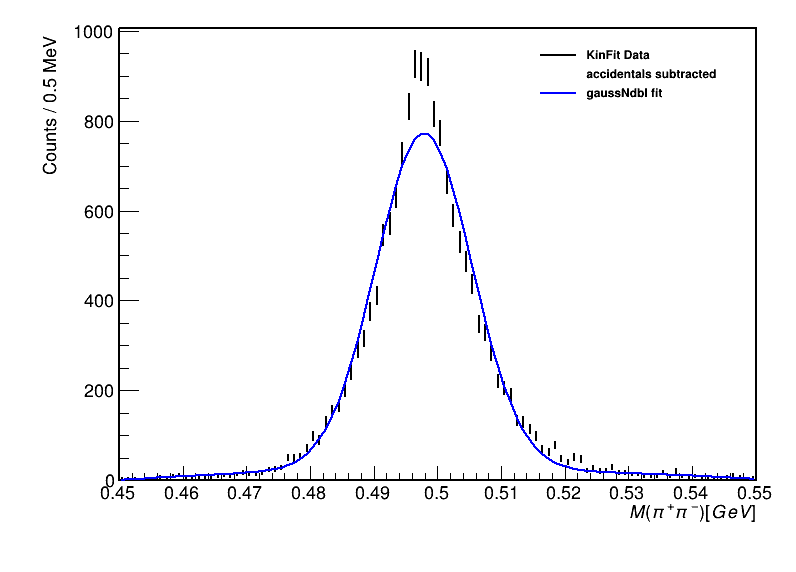

Info in <TCanvas::Print>: pdf file plots/ks_m_fit_gauss_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m_fit_gauss_TEST.png has been created


In [9]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",0.3,0.7)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 0.4976)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 0.4976)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.01)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 0.000)
    gaussNdbl.SetParameter("Linear_factor", 1.00)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_ks_reduced.SetStats(False)
    hist_ks_reduced.SetLineColor(ROOT.kBlack)
    hist_ks_reduced.SetLineStyle(1)
    hist_ks_reduced.SetLineWidth(2)
    hist_ks_reduced.GetXaxis().SetTitle(axisLabel)
    hist_ks_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_ks_reduced.Draw("")
    hist_ks_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_ks_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hMC.SetStats(False)
    # # hMC.SetMarkerColor(ROOT.kBlue)
    # # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerStyle(0)
    # # hMC.SetMarkerSize(0.8)
    # hMC.SetMarkerSize(0)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(1)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Scale(3.8)
    # hMC.Draw("same hist")
    # # hMC.Fit(voigtian, "RQ")
    # # voigtian.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_ks_reduced, ' KinFit Data', 'l')
    legend1.AddEntry(hist_ks_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/ks_m_fit_gauss_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort FITTING voigtian

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # Voigtian function
    voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 0.45, 0.55)
    voigtian.SetParName(0, "voigtian_amplitude")
    voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the mass peak at the correct position.
    voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
    voigtian.SetParName(3, "voigtian_width") # 'width' is the breit-wigner/lorentzian width (lifetime of the particle)

    # voigtian.SetParameter("voigtian_amplitude", 21.1638)
    # voigtian.SetParameter("voigtian_mean", 0.49797)
    # voigtian.SetParameter("voigtian_sigma", 0.00749)
    # voigtian.SetParameter("voigtian_width", 0.00001)
    voigtian.FixParameter(0, 38.900)
    voigtian.FixParameter(1, 0.49869)
    voigtian.FixParameter(2, 0.00464)
    voigtian.FixParameter(3, 0.01435)

    voigtian.SetLineColor(ROOT.kRed)
    voigtian.SetLineWidth(2)
    voigtian.SetLineStyle(1)

    # h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlack)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(2)
    # # h1.SetFillColor(ROOT.kRed)
    # # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Fit(voigtian, "RQ")
    # h1.Draw("hist")
    # voigtian.Draw("same")

    hMC.SetStats(False)
    # hMC.SetMarkerColor(ROOT.kBlue)
    # hMC.SetMarkerStyle(4)
    hMC.SetMarkerStyle(0)
    # hMC.SetMarkerSize(0.8)
    hMC.SetMarkerSize(0)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(1)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Scale(2.0)
    hMC.Fit(voigtian, "RQ")
    hMC.Draw("hist")
    voigtian.Draw("same")

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Data', 'l')
    legend1.AddEntry(hMC, ' MC', 'l')
    legend1.AddEntry(voigtian, ' voigtian fit', 'l')
    legend1.Draw('same')

    print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
    print("-" * 50)
    for i in range(voigtian.GetNpar()):
        name = voigtian.GetParName(i)
        val = voigtian.GetParameter(i)
        err = voigtian.GetParError(i)
        print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/ks_m_fit_VOIGTIAN_v4'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    # h1.SetStats(False)
    # h1.SetMarkerColor(ROOT.kMagenta)
    # h1.SetMarkerStyle(4)
    # h1.SetMarkerSize(0.8)
    # h1.SetLineColor(ROOT.kMagenta)
    # h1.SetLineStyle(1)
    # h1.SetLineWidth(1)
    # h1.SetFillColor(ROOT.kMagenta)
    # h1.SetFillStyle(3002)
    # h1.GetXaxis().SetTitle(axisLabel)
    # h1.Draw('pl, hist')

    # h2.SetStats(False)
    # h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(8)
    # h2.SetLineWidth(2)
    # h2.SetFillColor(ROOT.kBlue)
    # h2.SetFillStyle(3002)
    # h2.GetXaxis().SetTitle(axisLabel)
    # h2.Draw('same, hist')

    # h3.SetStats(False)
    # h3.SetMarkerColor(ROOT.kBlack)
    # h3.SetMarkerStyle(4)
    # h3.SetMarkerSize(0.8)
    # h3.SetLineColor(ROOT.kBlack)
    # h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    # h3.SetFillColor(920)
    # h3.SetFillStyle(302)
    # h3.GetXaxis().SetTitle(axisLabel)
    # h3.Draw("same,pl hist")

    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("same, hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(23.00)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, #Lambda flightSig, #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/Lambda_m_DATA-MC_man-t_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda FITTING gaussian

In [ ]:
# gaussNdbl = ROOT.TF1("gaussNdbl","gausn(0) + gausn(3) + gausn(6)",1.1,1.132)
# print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

# gauss_dbl = ROOT.TF1("gauss_dbl","gaus(0) + gaus(3)",1.1,1.132)
# print("Formula string:", gauss_dbl.GetFormula().GetExpFormula())

########

# write FSFunction to do fit using FSRoot fitting utilities.  See here:
# https://github.com/remitche66/FSRoot/blob/93bf25be31344a50fc1065e37017513ec56c8ced/FSFit/FSFitUtilities.h#L43

########

In [ ]:
# FSRoot fitting fuctions:

# SOURCE CODE:

# FSFitGAUS(TString n_fName, double n_xLow, double n_xHigh) :
#       FSFitFunction(n_fName,n_xLow,n_xHigh){ 
#       addParameter("N",10.0,"size");
#       addParameter("M",10.0,"mean");
#       addParameter("W",10.0,"width");
#     }

# hist_lamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainKSTAR892,tRange,rf)")


ROOT.FSFitUtilities.createFunction.FSFitGAUS("FSgaus",0.0,20.0));

# # Create the FSFitGAUS function
# FSgauss = ROOT.FSFitGAUS("mygauss", 1.1, 1.132)

# FSgauss.addParameter("N", 100.0)
# FSgauss.addParameter("M", 1.116)
# FSgauss.addParameter("W", 0.004)



Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: True
Fit status code: 0
Covariance matrix status: 2
Chi2: 145.63060902309016
NDF: 56
Chi2/NDF: 2.6005465896980384
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                   0.07621    0.00049
1     gaus1_mean                        1.14346    0.00030
2     gaus1_sigma_detectorResolution    0.03917    

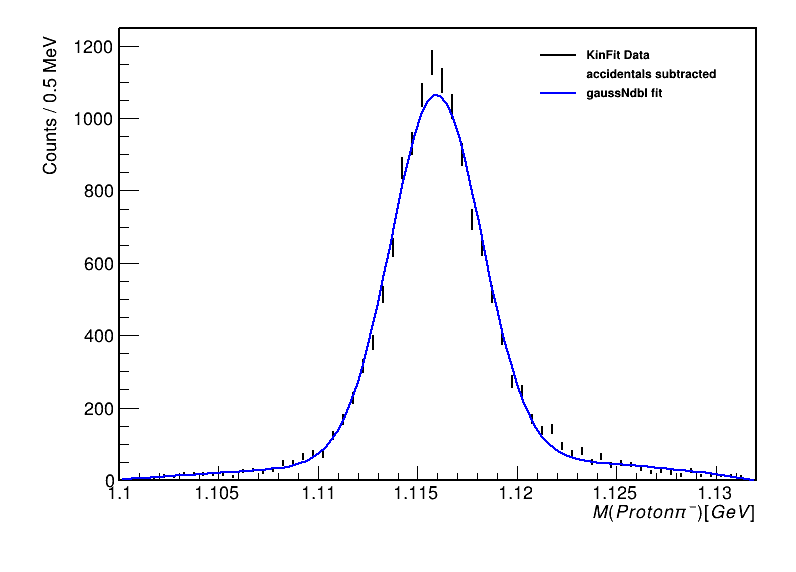

Info in <TCanvas::Print>: pdf file plots/Lambda_m_sb_gaussNdbl_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/Lambda_m_sb_gaussNdbl_TEST.png has been created


In [8]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",1.1,1.132)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 1.17344)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06407)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 1.11603)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.00159)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 10.658)
    gaussNdbl.SetParameter("Linear_factor", -10.222)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_lamb_reduced.SetStats(False)
    hist_lamb_reduced.SetLineColor(ROOT.kBlack)
    hist_lamb_reduced.SetLineStyle(1)
    hist_lamb_reduced.SetLineWidth(2)
    hist_lamb_reduced.GetXaxis().SetTitle(axisLabel)
    hist_lamb_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_lamb_reduced.Draw("")
    hist_lamb_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_lamb_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hMC.SetStats(False)
    # # hMC.SetMarkerColor(ROOT.kBlue)
    # # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerStyle(0)
    # # hMC.SetMarkerSize(0.8)
    # hMC.SetMarkerSize(0)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(1)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Scale(3.8)
    # hMC.Draw("same hist")
    # # hMC.Fit(voigtian, "RQ")
    # # voigtian.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_lamb_reduced, ' KinFit Data', 'l')
    legend1.AddEntry(hist_lamb_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/Lambda_m_sb_gaussNdbl_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda FITTING voigtian

In [ ]:
# from IPython.display import Image, display
# latex = ROOT.TLatex()

# plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
# axisLabel = 'M(Proton \pi^{-}) [GeV]'

# # INDICES ASSIGNED BY 'flatten':
# # 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# # 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# # 3. PiPlus1 (6)

# def plot_hist():

#     gluex_style()
#     ROOT.gStyle.SetOptStat(1111)  # show stats box with entries, mean, RMS, etc. (gluex_style toggles this off by default)
#     # clear histogram cache
#     ROOT.FSHistogram.clearHistogramCache()
    
#     canvas = ROOT.TCanvas('c', 'c', 800, 600)
#     canvas.SetLeftMargin(0.15)

#     # Voigtian function: Double_t TMath::Voigt(Double_t xx, Double_t sigma, Double_t lg, Int_t r)
#     voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.10, 1.14)
#     voigtian.SetParName(0, "voigtian_amplitude")
#     voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the mass peak at the correct position.
#     voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
#     voigtian.SetParName(3, "voigtian_width") # 'width' is the breit-wigner/lorentzian width (lifetime of the particle)

#     voigtian.SetParameter("voigtian_amplitude", 22.93888)
#     voigtian.SetParameter("voigtian_mean", 1.115683)
#     voigtian.SetParameter("voigtian_sigma", 0.00172)
#     # voigtian.SetParameter("voigtian_width", 0.00408)
#     # voigtian.FixParameter(0, 22.93888)
#     # voigtian.FixParameter(1, 1.11700)
#     # voigtian.FixParameter(2, 0.00172)
#     voigtian.FixParameter(3, 0.00000)

#     voigtian.SetLineColor(ROOT.kBlue)
#     voigtian.SetLineWidth(2)
#     voigtian.SetLineStyle(1)
#     # voigtian.SetMarkerStyle(4)
#     # voigtian.SetMarkerSize(2.0)
#     # voigtian.SetMarkerColor(ROOT.kRed)

#     h1_reduced.SetStats(True)
#     h1_reduced.SetLineColor(ROOT.kBlack)
#     h1_reduced.SetLineStyle(1)
#     h1_reduced.SetLineWidth(2)
#     # h1.SetFillColor(ROOT.kRed)
#     # h1.SetFillStyle(3002)
#     h1_reduced.GetXaxis().SetTitle(axisLabel)
#     h1_reduced.Fit(voigtian, "RQ")
#     h1_reduced.Draw("")
#     voigtian.Draw("same")

#     # h1_MEAS.SetStats(False)
#     # h1_MEAS.SetLineColor(ROOT.kBlue)
#     # h1_MEAS.SetLineStyle(1)
#     # h1_MEAS.SetLineWidth(2)
#     # # h1_MEAS.SetFillColor(ROOT.kRed)
#     # # h1_MEAS.SetFillStyle(3002)
#     # h1_MEAS.GetXaxis().SetTitle(axisLabel)
#     # # h1_MEAS.Fit(voigtian, "RQ")
#     # h1_MEAS.Draw("same hist")
#     # # voigtian.Draw("same")

#     # hTH.SetStats(True)
#     # hTH.SetLineColor(ROOT.kRed)
#     # hTH.SetLineStyle(1)
#     # hTH.SetLineWidth(1)
#     # # hTH.SetMarkerStyle(6)
#     # # hTH.SetMarkerSize(17.0)
#     # # hTH.SetMarkerColor(ROOT.kRed)
#     # hTH.SetFillColor(ROOT.kRed)
#     # # hTH.SetFillStyle(3002)
#     # hTH.GetXaxis().SetTitle(axisLabel)
#     # # hTH.Fit(voigtian, "RQ")
#     # hTH.Draw("hist")
#     # # voigtian.Draw("P same")

#     # hMC.SetStats(False)
#     # # hMC.SetMarkerColor(ROOT.kBlue)
#     # # hMC.SetMarkerStyle(4)
#     # hMC.SetMarkerStyle(0)
#     # # hMC.SetMarkerSize(0.8)
#     # hMC.SetMarkerSize(0)
#     # hMC.SetLineColor(ROOT.kBlue)
#     # hMC.SetLineStyle(1)
#     # hMC.SetLineWidth(2)
#     # hMC.SetFillColor(ROOT.kBlue)
#     # hMC.SetFillStyle(3002)
#     # hMC.GetXaxis().SetTitle(axisLabel)
#     # hMC.Scale(3.8)
#     # hMC.Draw("same hist")
#     # # hMC.Fit(voigtian, "RQ")
#     # # voigtian.Draw("same")

#     # hMC_MEAS.SetStats(False)
#     # # hMC.SetMarkerColor(ROOT.kBlue)
#     # # hMC.SetMarkerStyle(4)
#     # hMC_MEAS.SetMarkerStyle(0)
#     # # hMC.SetMarkerSize(0.8)
#     # hMC_MEAS.SetMarkerSize(0)
#     # hMC_MEAS.SetLineColor(ROOT.kBlue)
#     # hMC_MEAS.SetLineStyle(1)
#     # hMC_MEAS.SetLineWidth(2)
#     # hMC_MEAS.SetFillColor(ROOT.kBlue)
#     # hMC_MEAS.SetFillStyle(3002)
#     # hMC_MEAS.GetXaxis().SetTitle(axisLabel)
#     # hMC_MEAS.Scale(7.0)
#     # hMC_MEAS.Draw("hist")
#     # # hMC_MEAS.Fit(voigtian, "RQ")
#     # # voigtian.Draw("same")

#     legend1 = ROOT.TLegend(0.67, 0.66, 0.92, 0.76) # x_left, y_bottom, x_right, y_top
#     legend1.AddEntry(h1_prompt, ' KinFit Data', 'l')
#     legend1.AddEntry(h1_prompt, ' accidentals subtracted', "")
#     # legend1.AddEntry(h1_MEAS, ' Measured Data', 'l')
#     # legend1.AddEntry(hTH, ' THROWN MC', 'l')
#     # legend1.AddEntry(hMC, ' MC', 'l')
#     # legend1.AddEntry(hMC_MEAS, ' Measured MC', 'l')
#     legend1.AddEntry(voigtian, ' voigtian fit', 'l')
#     legend1.Draw("same hist")

#     print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
#     print("-" * 50)
#     for i in range(voigtian.GetNpar()):
#         name = voigtian.GetParName(i)
#         val = voigtian.GetParameter(i)
#         err = voigtian.GetParError(i)
#         print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

#     img_path = 'plots/Lambda_m_sb_voigtFit_TEST'
#     canvas.SaveAs(img_path + '.pdf')
#     canvas.SaveAs(img_path + '.png')
#     canvas.Close()
#     display(Image(filename=img_path + '.png'))
#     os.remove(img_path + '.png')

# plot_hist()

### Lambda sb

In [ ]:

from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats box with entries, mean, RMS, etc. (gluex_style toggles this off by default)
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # # Voigtian function: Double_t TMath::Voigt(Double_t xx, Double_t sigma, Double_t lg, Int_t r)
    # voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.11699, 1.11701)
    # voigtian.SetParName(0, "voigtian_amplitude")
    # voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the mass peak at the correct position.
    # voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
    # voigtian.SetParName(3, "voigtian_width") # 'width' is the breit-wigner/lorentzian width (lifetime of the particle)

    # voigtian.SetParameter("voigtian_amplitude", 22.9)
    # voigtian.SetParameter("voigtian_mean", 1.116)
    # voigtian.SetParameter("voigtian_sigma", 0.000182)
    # voigtian.SetParameter("voigtian_width", 0.00144)
    # # voigtian.FixParameter(0, 22.93888)
    # # voigtian.FixParameter(1, 1.11700)
    # # voigtian.FixParameter(2, 0.00172)
    # # voigtian.FixParameter(3, 0.00408)

    # # voigtian.SetLineColor(ROOT.kRed)
    # # voigtian.SetLineWidth(2)
    # # voigtian.SetLineStyle(1)
    # voigtian.SetMarkerStyle(4)
    # voigtian.SetMarkerSize(2.0)
    # voigtian.SetMarkerColor(ROOT.kRed)

    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.SetLineStyle(1)
    h1.SetLineWidth(2)
    h1.GetXaxis().SetTitle(axisLabel)
    # h1.Fit(voigtian, "RQ")
    h1.Draw("P")
    # voigtian.Draw("same")

    h1_sb.SetStats(False)
    h1_sb.SetLineColor(ROOT.kBlue)
    h1_sb.SetLineStyle(2)
    h1_sb.SetLineWidth(2)
    h1_sb.SetFillColor(ROOT.kBlue)
    h1_sb.SetFillStyle(3002)
    h1_sb.GetXaxis().SetTitle(axisLabel)
    # h1_sb.Fit(voigtian, "RQ")
    h1_sb.Draw("same hist")
    # voigtian.Draw("same")

    h2.SetStats(False)
    h2.SetLineColor(ROOT.kMagenta)
    h2.SetLineStyle(1)
    h2.SetLineWidth(2)
    h2.GetXaxis().SetTitle(axisLabel)
    # h2.Fit(voigtian, "RQ")
    h2.Draw("same hist")
    # voigtian.Draw("same")

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' #Lambda (prompt peak)', 'l')
    legend1.AddEntry(h1_sb, ' #Lambda (accidental sidebands)', 'l')
    legend1.AddEntry(h2, ' #Lambda (accidentals subtracted)', 'l')
    # legend1.AddEntry(voigtian, ' voigtian fit', 'l')
    legend1.Draw("same hist")

    # print(f"{'Index':<5} {'Name':<20} {'Value':>10} {'Error':>10}")
    # print("-" * 50)
    # for i in range(voigtian.GetNpar()):
    #     name = voigtian.GetParName(i)
    #     val = voigtian.GetParameter(i)
    #     err = voigtian.GetParError(i)
    #     print(f"{i:<5} {name:<20} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/Lambda_m_sidebands'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda mm

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '#Lambda Missing Mass'
axisLabel = '#Lambda Missing Mass'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kMagenta)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/decayingLambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### K*

Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: False
Fit status code: 4
Covariance matrix status: 2
Chi2: 1.4618030190484383e-05
NDF: 64
Chi2/NDF: 2.2840672172631848e-07
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                  -0.00001    0.00269
1     gaus1_mean                        0.51638  165.62316
2     gaus1_sigma_detectorResolution    0.

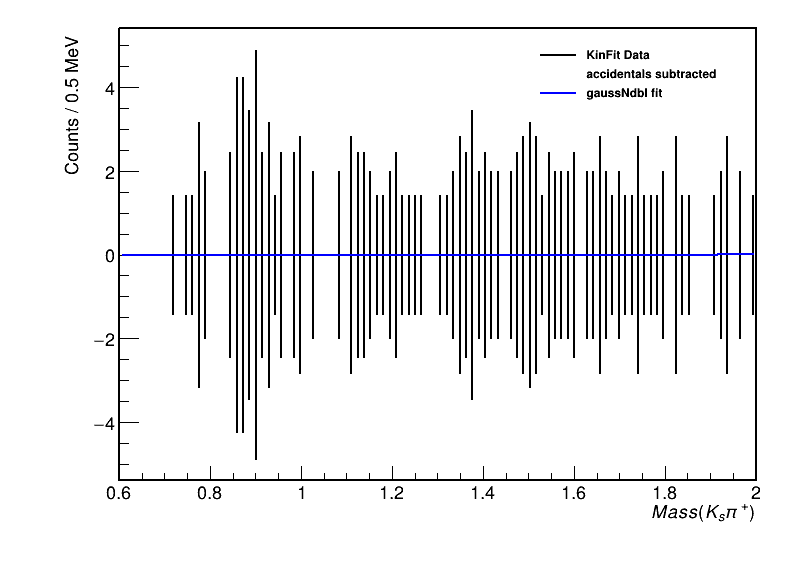

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/KsPip_m_fit_gauss_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/KsPip_m_fit_gauss_TEST.png has been created


In [12]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'Mass (K_{s} \pi^{+})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",0.0,2.5)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 0.892)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 0.892)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.01)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 0.000)
    gaussNdbl.SetParameter("Linear_factor", 1.00)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_k892_reduced.SetStats(False)
    hist_k892_reduced.SetLineColor(ROOT.kBlack)
    hist_k892_reduced.SetLineStyle(1)
    hist_k892_reduced.SetLineWidth(2)
    hist_k892_reduced.GetXaxis().SetTitle(axisLabel)
    hist_k892_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_k892_reduced.Draw("")
    hist_k892_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_k892_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hMC.SetStats(False)
    # # hMC.SetMarkerColor(ROOT.kBlue)
    # # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerStyle(0)
    # # hMC.SetMarkerSize(0.8)
    # hMC.SetMarkerSize(0)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(1)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Scale(3.8)
    # hMC.Draw("same hist")
    # # hMC.Fit(voigtian, "RQ")
    # # voigtian.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_k892_reduced, ' KinFit Data', 'l')
    legend1.AddEntry(hist_k892_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/KsPip_m_fit_gauss_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### ks-lamb

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} #Lambda)'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.SetLineStyle(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist')

    legend1 = ROOT.TLegend(0.25, 0.80, 0.60, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'all cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Pi Plus

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \pi^{+} Mass (primary)'
axisLabel = 'Mass (\pi^{+}) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(2.79)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, #Lambda flightSig, #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/PiPlus_m_DATA-MC'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort Pi Plus Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K_{s} \pi^{+} #Lambda)'
axisLabel = 'Mass (K_{s} \pi^{+} p \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsPipLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## 2D plots

### Dalitz

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(\pi^{+} \pi^{-} \pi^{+})^{2} [GeV]^{2}]'
XaxisLabel = 'M(p \pi^{-} \pi^{+})^{2} [GeV]^{2}]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')


    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h1, ' Initial cuts', 'l')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    # legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m2_initialCuts'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### 2D mass plots

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(K_{s} \pi^{+}) [GeV]'
XaxisLabel = 'M(#Lambda \pi^{+}) [GeV]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    canvas.SetRightMargin(.15)    

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')


    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h1, ' Initial cuts', 'l')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig', 'pl')
    # legend1.AddEntry(h1, ' Initial, K_{s} & #Lambda flightSig, K_{s} & #Lambda mass sel.', 'l')
    # legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m_BASICCUTS-ONLY'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()